# t-SNE (t-Distributed Stochastic Neighbor Embedding) – Theory

---

## 1. Definition
t-SNE is an **unsupervised non-linear dimensionality reduction technique** primarily used for **visualizing high-dimensional data** in 2D or 3D space.  
It preserves the **local structure** of data, meaning that similar points stay close together in the lower-dimensional representation.

---

## 2. Key Idea
- Converts **high-dimensional Euclidean distances** into **conditional probabilities** representing similarities.  
- Tries to **minimize the Kullback–Leibler divergence** between the high-dimensional and low-dimensional probability distributions.  
- Focuses on **preserving local neighborhoods** rather than global structure.

---

## 3. Steps
1. Compute pairwise similarities of points in high-dimensional space.  
2. Initialize points randomly in 2D or 3D space.  
3. Iteratively adjust positions to **minimize divergence** between high- and low-dimensional distributions.

---

## 4. Applications
- Visualizing embeddings of **images, text, or gene expression data**  
- Exploring **clusters** in high-dimensional datasets  
- Evaluating **feature extraction** or **representation learning**  

---

## 5. Advantages
- Excellent for **visual exploration** of high-dimensional data.  
- Preserves **local relationships** very well.  
- Widely used in **machine learning research** for understanding embeddings.

---

## 6. Limitations
- Computationally expensive for **very large datasets**.  
- Results can vary between runs (sensitive to initialization).  
- Does **not preserve global distances** accurately.  
- Requires **tuning of hyperparameters**: `perplexity`, `learning_rate`, `n_iter`.

---

## 7. Implementation
- Available in scikit-learn: `sklearn.manifold.TSNE`  
- Key parameters:
  - `n_components`: Output dimensions (usually 2 or 3)  
  - `perplexity`: Balances local vs. global structure (typically 5–50)  
  - `learning_rate`: Step size for optimization  
  - `n_iter`: Number of iterations for optimization  


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


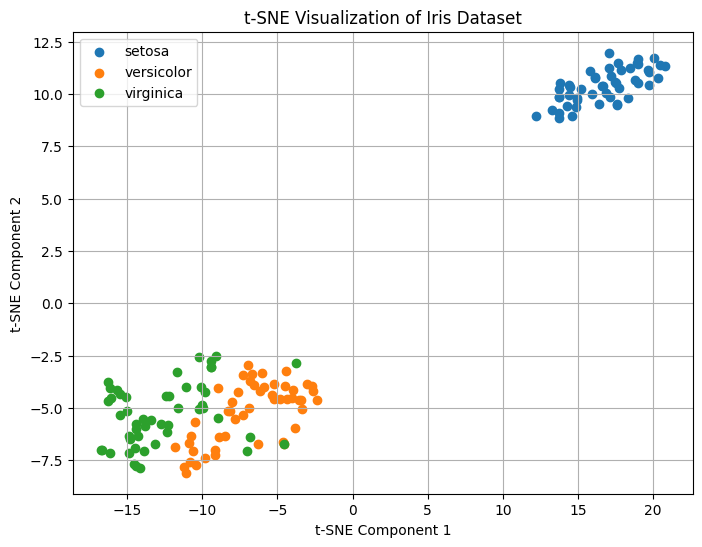

In [1]:
# ==============================
# t-SNE (t-Distributed Stochastic Neighbor Embedding)
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Create DataFrame with t-SNE components
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
tsne_df['target'] = y

# 5. Visualization
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(
        tsne_df[tsne_df['target'] == i]['tSNE1'],
        tsne_df[tsne_df['target'] == i]['tSNE2'],
        label=target_name
    )
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()
